# Kidney disease detection model

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reducing the dataset to 14 important columns

In [2]:
#reducing the datset with selected features
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = '/content/drive/MyDrive/kidney_disease.csv'
df = pd.read_csv(file_path)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Specify important features and target
selected_features = ['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'htn', 'dm', 'cad']
target_col = 'classification'

# Columns by types (subset those in selected_features)
numeric_cols = ['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'hemo']
object_numeric_cols = ['pcv']
categorical_cols = ['htn', 'dm', 'cad']

# Impute numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Impute object numeric columns with mode then convert to numeric
for col in object_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute categorical cols with mode then encode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = LabelEncoder().fit_transform(df[col])

# Clean target variable
df[target_col] = df[target_col].str.strip().str.lower()
df[target_col] = df[target_col].map({'ckd': 1, 'notckd': 0})

# Create final cleaned reduced dataframe
df_reduced = df[selected_features + [target_col, 'id']]  # keeping 'id' for patient prediction

# Check cleaned and reduced dataframe
print(df_reduced.head())
print(f"\nColumns in reduced dataset: {list(df_reduced.columns)}")


    age    bp     sg   al         bgr    bu   sc  hemo   pcv  htn  dm  cad  \
0  48.0  80.0  1.020  1.0  121.000000  36.0  1.2  15.4  44.0    1   4    1   
1   7.0  50.0  1.020  4.0  148.036517  18.0  0.8  11.3  38.0    0   3    1   
2  62.0  80.0  1.010  2.0  423.000000  53.0  1.8   9.6  31.0    0   4    1   
3  48.0  70.0  1.005  4.0  117.000000  56.0  3.8  11.2  32.0    1   3    1   
4  51.0  80.0  1.010  2.0  106.000000  26.0  1.4  11.6  35.0    0   3    1   

   classification  id  
0               1   0  
1               1   1  
2               1   2  
3               1   3  
4               1   4  

Columns in reduced dataset: ['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'htn', 'dm', 'cad', 'classification', 'id']


# Importing libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Explore dataset

In [4]:
# Explore dataset
print("First 5 rows:\n", df_reduced.head())
print("\nData info:\n")
print(df_reduced.info())
print("\nMissing values count:\n", df_reduced.isnull().sum())

First 5 rows:
     age    bp     sg   al         bgr    bu   sc  hemo   pcv  htn  dm  cad  \
0  48.0  80.0  1.020  1.0  121.000000  36.0  1.2  15.4  44.0    1   4    1   
1   7.0  50.0  1.020  4.0  148.036517  18.0  0.8  11.3  38.0    0   3    1   
2  62.0  80.0  1.010  2.0  423.000000  53.0  1.8   9.6  31.0    0   4    1   
3  48.0  70.0  1.005  4.0  117.000000  56.0  3.8  11.2  32.0    1   3    1   
4  51.0  80.0  1.010  2.0  106.000000  26.0  1.4  11.6  35.0    0   3    1   

   classification  id  
0               1   0  
1               1   1  
2               1   2  
3               1   3  
4               1   4  

Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-

# Data Cleaning and Preprocessing

In [5]:
df_reduced['pcv'] = df_reduced['pcv'].fillna(df_reduced['pcv'].median())

# missing values after data cleaning
print("\nMissing values count :\n", df_reduced.isnull().sum())



Missing values count :
 age               0
bp                0
sg                0
al                0
bgr               0
bu                0
sc                0
hemo              0
pcv               0
htn               0
dm                0
cad               0
classification    0
id                0
dtype: int64


/tmp/ipython-input-3265469228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['pcv'] = df_reduced['pcv'].fillna(df_reduced['pcv'].median())


# Visualization of the dataset

/tmp/ipython-input-523023978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['classification_encoded'] = df_reduced['classification'].map({1: 'CKD', 0: 'Not CKD'})


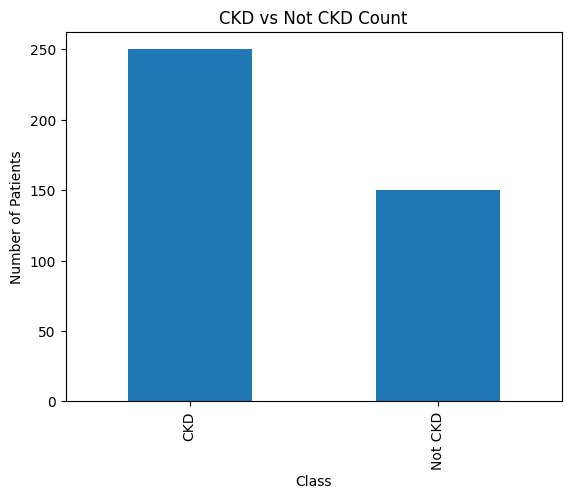

In [6]:
# Number of patients having ckd vs not having ckd
df_reduced['classification_encoded'] = df_reduced['classification'].map({1: 'CKD', 0: 'Not CKD'})
df_reduced['classification_encoded'].value_counts().plot(kind='bar')
plt.title('CKD vs Not CKD Count')
plt.xlabel('Class')
plt.ylabel('Number of Patients')
plt.show()

/tmp/ipython-input-3336926852.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_counts = df_reduced.groupby(['age_group', target_col]).size().unstack(fill_value=0)


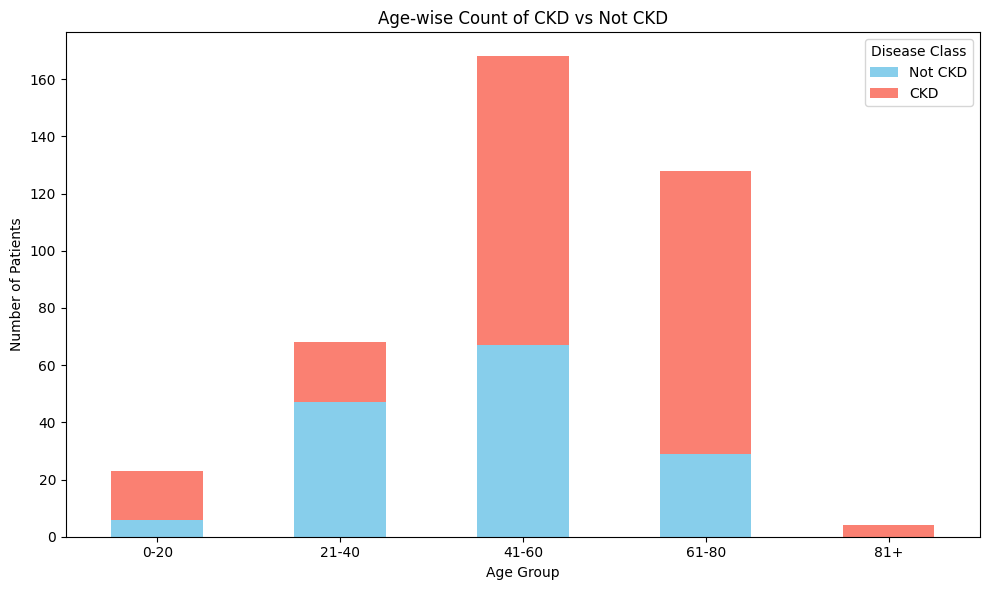

In [7]:
#age group having ckd vs not having ckd
df_reduced = pd.read_csv(file_path)
df_reduced.replace('?', pd.NA, inplace=True)
df_reduced[target_col] = df_reduced[target_col].str.strip().str.lower().map({'ckd':1, 'notckd':0})
df_reduced = df_reduced[pd.to_numeric(df_reduced['age'], errors='coerce').notnull()]
df_reduced['age_group'] = pd.cut(df_reduced['age'].astype(float), bins=[0,20,40,60,80,100], labels=['0-20','21-40','41-60','61-80','81+'])

age_class_counts = df_reduced.groupby(['age_group', target_col]).size().unstack(fill_value=0)
age_class_counts.columns = ['Not CKD', 'CKD']

age_class_counts.plot.bar(stacked=True, color=['skyblue', 'salmon'], figsize=(10,6))
plt.title('Age-wise Count of CKD vs Not CKD')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Disease Class')
plt.tight_layout()
plt.show()


# Spliting the dataset and Training the model

In [9]:

df_reduced = df[selected_features + [target_col, 'id']]

# Train-test split
X = df_reduced.drop([target_col, 'id'], axis=1)
y = df_reduced[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with scaling and RF model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

# Prediction

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix:
 [[28  0]
 [ 0 52]]


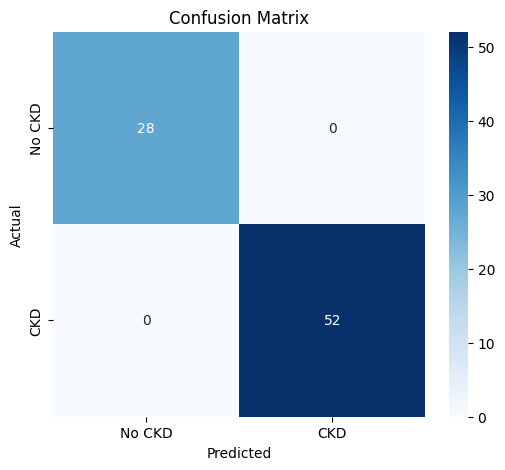

In [10]:
# Evaluation
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# Feature Importances plot

/tmp/ipython-input-3972499172.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(selected_features)[indices], palette='viridis')


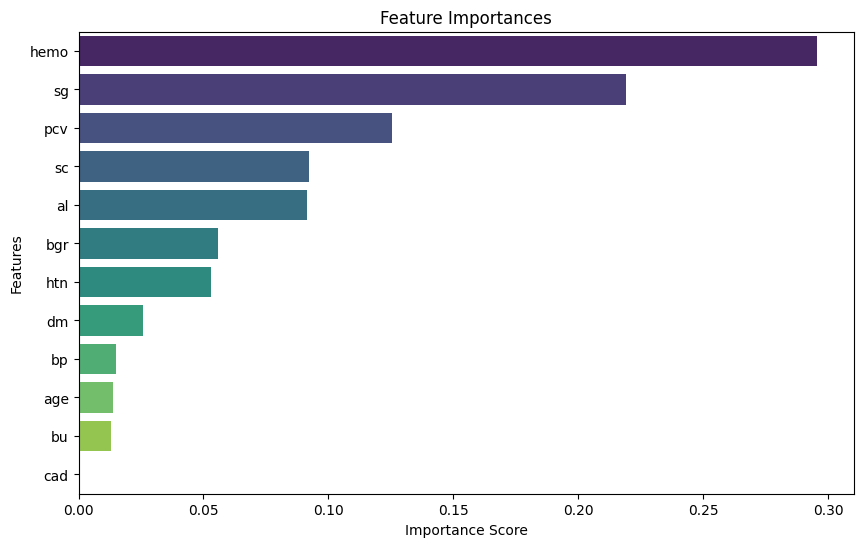

In [11]:
importances = pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(selected_features)[indices], palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [16]:
import joblib
import os

selected_features = ['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'htn', 'dm', 'cad'] # your feature column names list
numeric_cols = ['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'hemo']       # your numeric columns list
object_numeric_cols = ['pcv']
categorical_cols = ['htn', 'dm', 'cad']

# Creating artifact dictionary
artifact = {
    'model': pipeline,                 #traine d model pipeline
    'feature_cols': selected_features,
    'numeric_cols': numeric_cols,
    'object_numeric_cols': object_numeric_cols,
    'categorical_cols': categorical_cols
}

# Saving the artifact
joblib.dump(artifact, 'artifacts_kidney.joblib')
print("Saved artifacts_kidney.joblib, size (MB):", round((os.path.getsize('artifacts_kidney.joblib')/1024/1024), 2))


Saved artifacts_kidney.joblib, size (MB): 0.23


In [27]:
import pandas as pd
import joblib

# Load artifact
art = joblib.load('artifacts_kidney.joblib')
model = art['model']                   # trained pipeline
feature_cols = art['feature_cols']    # feature columns list

# Example new patient form data
new_patient = {
    'age': 71,
    'bp': 70,
    'sg': 1.01,
    'al': 3.0,
    'bgr': 219,
    'bu': 82,
    'sc': 3.6,
    'hemo': 10.4,
    'pcv': 33,
    'htn': 1,
    'dm': 1,
    'cad': 1
}

# Convert to DataFrame with same columns as model expects
new_patient_df = pd.DataFrame([new_patient])[feature_cols]

# Predict risk probability
pred = model.predict(new_patient_df)[0]  # 0 = No CKD, 1 = CKD
prob = model.predict_proba(new_patient_df)[0,1]
risk_percent = round(prob * 100, 2)

if pred == 1:
    print(f"Prediction: Chronic Kidney Disease DETECTED with risk probability of {risk_percent}%.")
else:
    print(f"Prediction: No Chronic Kidney Disease detected (Risk probability: {risk_percent}%).")




Prediction: Chronic Kidney Disease DETECTED with risk probability of 100.0%.


In [30]:
import pandas as pd
import joblib

# Load artifact
art = joblib.load('artifacts_kidney.joblib')
model = art['model']                   # trained pipeline
feature_cols = art['feature_cols']    # feature columns list

# Example new patient form data
new_patient = {
    'age': 52,
    'bp': 80,
    'sg': 1.025,
    'al': 0.0,
    'bgr': 99,
    'bu': 25,
    'sc': 0.8,
    'hemo': 15.0,
    'pcv': 52,
    'htn': 0,
    'dm': 0,
    'cad': 0
}

# Convert to DataFrame with same columns as model expects
new_patient_df = pd.DataFrame([new_patient])[feature_cols]

# Predict risk probability
# Predict risk probability
pred = model.predict(new_patient_df)[0]  # 0 = No CKD, 1 = CKD
prob = model.predict_proba(new_patient_df)[0,1]
risk_percent = round(prob * 100, 2)

if pred == 1:
    print(f"Prediction: Chronic Kidney Disease DETECTED with risk probability of {risk_percent}%.")
else:
    print(f"Prediction: No Chronic Kidney Disease detected (Risk probability: {risk_percent}%).")




Prediction: No Chronic Kidney Disease detected (Risk probability: 0.0%).


In [33]:
from google.colab import files
files.download('artifacts_kidney.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>